<a href="https://colab.research.google.com/github/ashiq-056/Clustering/blob/main/k_medoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import Birch

In [ ]:
df = pd.read_excel("data.xlsx")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,79
196,197,Female,0.519231,0.909836,28
197,198,Male,0.269231,0.909836,74
198,199,Male,0.269231,1.000000,18


In [ ]:
T = []
l = list(df['Gender'])
for i in l:
  if i == 'Male':
    T.append(True)
  else:
    T.append(False)

In [ ]:
colors = {True: 'red', False: 'green'}
T_col = [colors[i] for i in T]

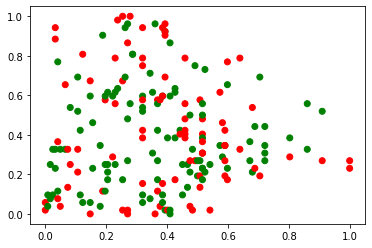

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Age'], c=T_col)

In [ ]:
data = df[['Age', 'Annual Income (k$)']].iloc[: , :].values

In [ ]:
m, f = data.shape
k=3
m,f

(200, 2)

In [ ]:
def set_medoids(X, k):
  np.random.seed(1)
  sample = np.random.choice(len(X), size=k, replace=False)
  #print(sample)
  return X[sample, :]
init_med = set_medoids(data, 2)

In [ ]:
init_med

array([[0.17307692, 0.25409836],
       [0.90384615, 0.18852459]])

In [ ]:
def distance(X, medoids, p):
  m = len(X)
  medoids_shape = medoids.shape
  if len(medoids_shape) == 1: 
    medoids = medoids.reshape((1,len(medoids)))
  k = len(medoids)
  M = np.empty((m,k))
  for i in range(m):
    cost = np.linalg.norm(X[i,:] - medoids, ord=p, axis=1)
    M[i, :] = cost**p
    #print(M)
  return M
M = distance(data, init_med, 2)

In [ ]:
def label(M):
  return np.argmin(M, axis=1)
labels = label(M)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
def update(X, medoids, p):
  M = distance(data, medoids, p)
  labels = label(M)
  o_med = medoids
  for i in set(labels):
    dissimilarity = np.sum(distance(data, medoids[i], p))
    datapoint = data[labels == i]

    for j in datapoint:
      n_med = j;
      n_dissimilarity = np.sum(distance(data, j, p))
      if n_dissimilarity < dissimilarity:
        dissimilarity = n_dissimilarity
        o_med[i] = j
  return o_med

In [ ]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [ ]:
def kmedoids(X, k, p, start= None, max_itr = 10000):
  if start is None:
    medoids = set_medoids(X, k)
  else:
    medoids = start

  converged = False
  labels = np.zeros(len(X))
  i = 1
  while (not converged) and (i<= max_itr):
    old_medoids = medoids.copy()
    M = distance(X, medoids, p)
    labels = label(M)
    medoids = update(X, medoids, p)
    converged = has_converged(old_medoids, medoids)
    i = i+1
  return (medoids, labels)

In [ ]:
result = kmedoids(data, 2, 2)

In [ ]:
final_medoids = result[0]
final_medoids

array([[0.42307692, 0.36885246],
       [0.51923077, 0.31967213]])

In [ ]:
result[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
df["Predict"] = result[1]

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Predict
0,1,Male,0.019231,0.000000,39,0
1,2,Male,0.057692,0.000000,81,0
2,3,Female,0.038462,0.008197,6,0
3,4,Female,0.096154,0.008197,77,0
4,5,Female,0.250000,0.016393,40,0
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,79,0
196,197,Female,0.519231,0.909836,28,0
197,198,Male,0.269231,0.909836,74,0
198,199,Male,0.269231,1.000000,18,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

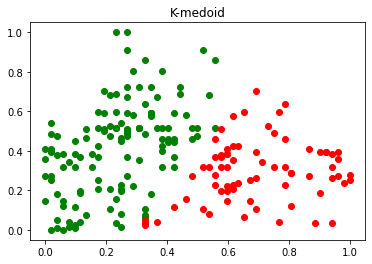

In [ ]:
df1 = df[df.Predict==0]
df2 = df[df.Predict==1]
#df3 = df[df.Predict==2]
#df4 = df[df.Predict==3]
plt.title('K-medoid')
plt.scatter(df1["Age"],df1['Annual Income (k$)'],color='green')
plt.scatter(df2["Age"],df2['Annual Income (k$)'],color='red')
#plt.scatter(df3["Age"],df3['Annual Income (k$)'],color='black')
from google.colab import files
plt.savefig("clustered.png")
files.download("clustered.png")

In [ ]:
silhouette = silhouette_score(data, result[1])
silhouette

0.4038759146047282

In [ ]:
ari = adjusted_rand_score(T, result[1])
ari

-0.0041168662134922485

In [ ]:
nmi = normalized_mutual_info_score(T, result[1])
nmi

3.365819859656065e-05